In [77]:
import pymongo
import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd

In [5]:
mc = pymongo.MongoClient() 

db = mc['movies_metadata']


In [6]:
mc.database_names()

['admin', 'local', 'movies_metadata', 'nyt_dump', 'tweets']

In [7]:
db.collection_names()

['test', 'movies', 'movies_backup', 'movies_clean_v2', 'movies_clean']

In [9]:
test = db['test']  # Use (or create) a collection called 'test'
movies = db['movies'] #Create a collection called movies
movies_clean_v2 = db['movies_clean_v2']

In [10]:
len(list(movies_clean_v2.find()))

1583

In [11]:
df_clean = pd.DataFrame(list(movies_clean_v2.find()))
df_clean.head()

,_id,data,title
0,5af4cd0d7cfdd30e1919a126,"{'Casting Director': 'Nick Horbaczewski', 'Dom...",Star Wars Ep. VIII: The Last Jedi (2017)
1,5af4cd0d7cfdd30e1919a127,{'Visual Effects Supervisor': 'Chris Corbould'...,Beauty and the Beast (2017)
2,5af4cd0d7cfdd30e1919a128,"{'Set Decorator': ['Tim Rice', 'Danielle Berma...",The Fate of the Furious (2017)
3,5af4cd0d7cfdd30e1919a129,"{'Second Unit Director': 'Jack Gill', 'Domesti...",Despicable Me 3 (2017)
4,5af4cd0e7cfdd30e1919a12a,"{'Score Mixer': 'Noah Snyder', 'Domestic Box O...",Jumanji: Welcome to the Jungle (2017)


In [12]:
df_clean_data = pd.DataFrame(list(df_clean['data']))
df_clean_data.head()

,,1st Assistant Director,3-D and Digital Image Producer,3D Animator,3D Stereoscopic Supervisor,ADR Editor,ADR Mixer,ADR Recording Engineer,ADR/Dialogue Editor,Action Choreographer,...,Visual Effects Supervisor: MPC,Visual Effects Supervisor: Milk Visual Effects,Visual Effects by,Wardrobe Supervisor,Worldwide Box Office,Written By,Written by,based on the novel “A Monster Calls” by,lead_cast,story based on a novel by
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1320214241,NaN,NaN,NaN,"[Mark Hamill, Carrie Fisher, Adam Driver, Dais...",NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1263109573,NaN,NaN,NaN,"[Emma Watson, Dan Stevens, Luke Evans, Kevin K...",NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1237466026,NaN,NaN,NaN,"[Vin Diesel, Dwayne Johnson, Jason Statham, Mi...",NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1034542646,NaN,NaN,NaN,"[Vin Diesel, Dwayne Johnson, Jason Statham, Mi...",NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,958513171,NaN,NaN,NaN,"[Dwayne Johnson, Jack Black, Kevin Hart, Karen...",NaN


In [13]:
df_clean_data_trim = df_clean_data.loc[:, ['Worldwide Box Office', 'Domestic Box Office', 'International Box Office','Production Budget','Source']]
df_clean_data_trim

,Worldwide Box Office,Domestic Box Office,International Box Office,Production Budget,Source
0,1320214241,620181382,700032859,NaN,Original Screenplay
1,1263109573,504014165,759095408,160000000,Remake
2,1237466026,225764765,1011701261,250000000,Original Screenplay
3,1034542646,264624300,769918346,75000000,Original Screenplay
4,958513171,404353892,554159279,90000000,Original Screenplay
5,880210429,334201140,546009289,175000000,Based on Comic/Graphic Novel
6,863197744,389813101,473384643,200000000,Based on Comic/Graphic Novel
7,850653412,315058289,535595123,180000000,Based on Comic/Graphic Novel
8,817012815,412563408,404449407,150000000,Based on Comic/Graphic Novel
9,800398408,209726015,590672393,175000000,Based on Folk Tale/Legend/Fairytale


In [15]:
# df_clean_data_trim['WW Aggregate'] = int(df_clean_data_trim['Domestic Box Office']) + int(df_clean_data_trim['International Box Office'])
# df_clean_data_trim

df_clean_data_trim['Domestic Box Office'].fillna(0, inplace=True)
df_clean_data_trim['International Box Office'].fillna(0, inplace=True)
df_clean_data_trim['Production Budget'].fillna(10000000, inplace=True)

df_clean_data_trim['Domestic Box Office'] = df_clean_data_trim['Domestic Box Office'].apply(pd.to_numeric)
df_clean_data_trim['International Box Office'] = df_clean_data_trim['International Box Office'].apply(pd.to_numeric)
df_clean_data_trim['ww_agg'] = df_clean_data_trim['Domestic Box Office'] + df_clean_data_trim['International Box Office']
df_clean_data_trim['Production Budget'] = df_clean_data_trim['Production Budget'].apply(pd.to_numeric)

df_clean_data_trim['log_ww_agg'] = df_clean_data_trim['ww_agg'].apply(np.log)
df_clean_data_trim['log_budget'] = df_clean_data_trim['Production Budget'].apply(np.log)

df_clean_data_trim.head()

,Worldwide Box Office,Domestic Box Office,International Box Office,Production Budget,Source,ww_agg,log_ww_agg,log_budget
0,1320214241,620181382,700032859,10000000,Original Screenplay,1320214241,21.001060,16.118096
1,1263109573,504014165,759095408,160000000,Remake,1263109573,20.956842,18.890684
2,1237466026,225764765,1011701261,250000000,Original Screenplay,1237466026,20.936332,19.336971
3,1034542646,264624300,769918346,75000000,Original Screenplay,1034542646,20.757225,18.132999
4,958513171,404353892,554159279,90000000,Original Screenplay,958513171,20.680894,18.315320


In [18]:
x = df_clean_data.loc[:,'MPAA Rating']

In [56]:
x_str = x.apply(lambda a: str(a))


In [57]:
first_words = x_str.apply(lambda a: a.split()[0])

In [71]:
def parse_mpaa_col(dataframe):
    ratings = dataframe.loc[:,'MPAA Rating']
    ratings = ratings.apply(lambda a: str(a))
    ratings = ratings.apply(lambda b: b.split()[0])
    dataframe['MPAA Rating'] = ratings
    return ratings, dataframe

In [72]:
parse_mpaa_col(df_clean_data)

(0          PG-13
 1             PG
 2          PG-13
 3             PG
 4          PG-13
 5          PG-13
 6          PG-13
 7          PG-13
 8          PG-13
 9             PG
 10         PG-13
 11             R
 12         PG-13
 13             R
 14         PG-13
 15         PG-13
 16            PG
 17         PG-13
 18         PG-13
 19            PG
 20         PG-13
 21             R
 22      G(Rating
 23             R
 24         PG-13
 25         PG-13
 26            PG
 27             R
 28            PG
 29            PG
           ...   
 1553         Not
 1554         Not
 1555         Not
 1556           R
 1557         nan
 1558         Not
 1559           R
 1560         Not
 1561         Not
 1562           R
 1563         Not
 1564         Not
 1565         Not
 1566         Not
 1567           R
 1568           R
 1569         Not
 1570           R
 1571         nan
 1572         nan
 1573           R
 1574           R
 1575           R
 1576         nan
 1577     

In [75]:
df_clean_data['MPAA Rating'].unique()

array(['PG-13', 'PG', 'R', 'G(Rating', 'nan', 'Not', 'G'], dtype=object)

(array([ 490.,   11.,    9.,   10.,   10.,    9.,   11.,   11.,   11.,
          11.,   11.,   11.,   11.,   11.,   10.,   12.,   11.,   11.,
          12.,   10.,   12.,   11.,   10.,   10.,   10.,   11.,   10.,
          10.,   11.,   11.,   11.,   11.,   11.,    9.,   11.,   10.,
          10.,   10.,   12.,   12.,   13.,   12.,   10.,   12.,   12.,
          11.,   11.,   11.,   11.,   11.,   12.,   11.,   11.,   11.,
          13.,   11.,   11.,   12.,   12.,   11.,   11.,   12.,   11.,
          11.,   11.,   11.,   11.,   12.,   11.,   11.,   11.,   11.,
          10.,   12.,   11.,   11.,   12.,   12.,   12.,   11.,   11.,
          11.,   10.,   11.,   11.,   12.,   11.,   11.,   11.,   11.,
          10.,   12.,   11.,   11.,   11.,   11.,   12.,   11.,   11.,   13.]),
 array([ -1.00000000e+00,   1.00200000e+01,   2.10400000e+01,
          3.20600000e+01,   4.30800000e+01,   5.41000000e+01,
          6.51200000e+01,   7.61400000e+01,   8.71600000e+01,
          9.81800000e+01

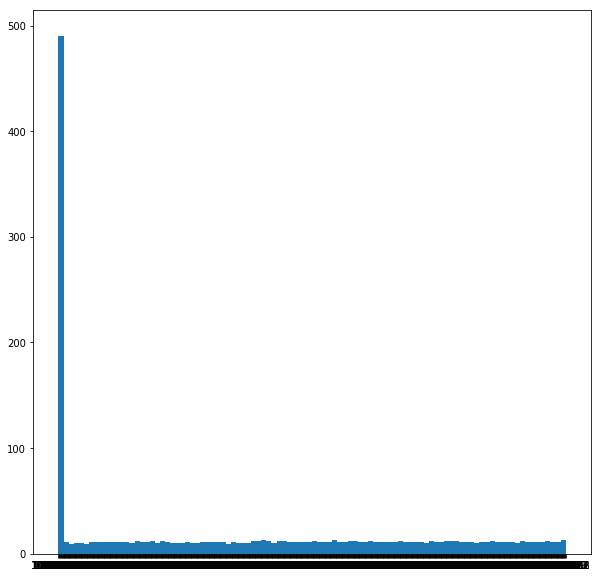

In [81]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.hist(df_clean_data_trim['Worldwide Box Office'], bins = 100)

(array([  1.22400000e+03,   7.30000000e+01,   5.10000000e+01,
          3.10000000e+01,   2.30000000e+01,   2.00000000e+01,
          1.60000000e+01,   1.20000000e+01,   1.50000000e+01,
          1.00000000e+01,   7.00000000e+00,   1.00000000e+01,
          4.00000000e+00,   3.00000000e+00,   7.00000000e+00,
          5.00000000e+00,   7.00000000e+00,   1.00000000e+00,
          5.00000000e+00,   4.00000000e+00,   3.00000000e+00,
          2.00000000e+00,   2.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   4.00000000e+00,   1.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   3.00000000e+00,   2.00000000e+00,
          1.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   3.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   3.00000000e+00,
          3.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   2.00000000e+00,   0.00000000e+00,
        

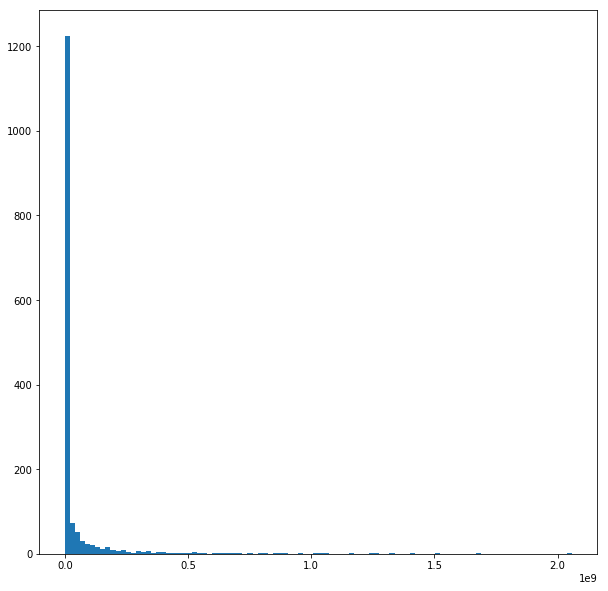

In [82]:
fig, ax = plt.subplots(1, figsize=(10,10))
ax.hist(df_clean_data_trim['ww_agg'], bins = 100)

In [83]:
df_clean_data_trim['MPAA Rating'] = df_clean_data['MPAA Rating']

In [84]:
df_clean_data_trim.head()

,Worldwide Box Office,Domestic Box Office,International Box Office,Production Budget,Source,ww_agg,log_ww_agg,log_budget,MPAA Rating
0,1320214241,620181382,700032859,10000000,Original Screenplay,1320214241,21.001060,16.118096,PG-13
1,1263109573,504014165,759095408,160000000,Remake,1263109573,20.956842,18.890684,PG
2,1237466026,225764765,1011701261,250000000,Original Screenplay,1237466026,20.936332,19.336971,PG-13
3,1034542646,264624300,769918346,75000000,Original Screenplay,1034542646,20.757225,18.132999,PG
4,958513171,404353892,554159279,90000000,Original Screenplay,958513171,20.680894,18.315320,PG-13


In [85]:
groups_ratings = df_clean_data_trim.groupby('MPAA Rating')

In [88]:
groups_ratings.mean()

,Domestic Box Office,International Box Office,Production Budget,ww_agg,log_ww_agg,log_budget
MPAA Rating,,,,,,
G,1.584332e+06,7.409785e+05,1.000000e+07,2.325310e+06,13.922940,16.118096
G(Rating,3.213823e+07,3.628246e+07,1.800000e+07,6.842069e+07,14.503724,16.117091
Not,1.154041e+05,2.472487e+05,9.645527e+06,3.626528e+05,10.371083,15.996240
PG,5.658844e+07,8.953818e+07,3.967164e+07,1.461266e+08,15.612146,16.818635
PG-13,5.444800e+07,9.027305e+07,4.553883e+07,1.447210e+08,16.201803,16.854002
R,1.514025e+07,1.758438e+07,1.612964e+07,3.272462e+07,13.991456,16.255614
nan,0.000000e+00,9.687077e+05,1.000000e+07,9.687077e+05,10.758669,16.118096


In [89]:
groups_ratings.median()

,Domestic Box Office,International Box Office,Production Budget,ww_agg,log_ww_agg,log_budget
MPAA Rating,,,,,,
G,1584332.0,740978.5,10000000.0,2325310.5,13.922940,16.118096
G(Rating,3998619.5,378256.5,10000000.0,4486785.5,14.665457,16.118096
Not,17575.0,0.0,10000000.0,26632.0,10.189869,16.118096
PG,2349258.5,1780134.0,10000000.0,6532619.0,15.688215,16.118096
PG-13,13099931.0,6626141.0,10000000.0,25863405.0,17.068340,16.118096
R,502731.5,387154.5,10000000.0,1571156.5,14.267272,16.118096
nan,0.0,68618.0,10000000.0,68618.0,11.136310,16.118096


In [90]:
groups_ratings.count()

,Worldwide Box Office,Domestic Box Office,International Box Office,Production Budget,Source,ww_agg,log_ww_agg,log_budget
MPAA Rating,,,,,,,,
G,2,2,2,2,2,2,2,2
G(Rating,9,10,10,10,10,10,10,10
Not,168,469,469,469,468,469,469,469
PG,109,134,134,134,134,134,134,134
PG-13,261,309,309,309,309,309,309,309
R,408,512,512,512,511,512,512,512
nan,147,147,147,147,147,147,147,147


In [116]:
def parse_runtime_col(dataframe):
    runtime = dataframe['Running Time']
    runtime = runtime.apply(lambda x: str(x))
    runtime = runtime.apply(lambda x: x.split()[0])
    runtime = runtime.apply(int)
    return runtime

In [117]:
parse_runtime_col(df_clean_data)

ValueError: invalid literal for int() with base 10: 'nan'

In [106]:
runtime = df_clean_data['Running Time']

In [113]:
runtime.describe()

count           1437
unique           103
top       90 minutes
freq              84
Name: Running Time, dtype: object

In [114]:
len(runtime)

1583

In [126]:
 df_clean_data['Franchise'].isna()  ^1

0        True
1       False
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9       False
10       True
11      False
12       True
13       True
14       True
15       True
16       True
17      False
18       True
19      False
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28      False
29      False
        ...  
1553    False
1554    False
1555    False
1556     True
1557    False
1558    False
1559    False
1560    False
1561    False
1562    False
1563    False
1564    False
1565    False
1566    False
1567    False
1568    False
1569    False
1570    False
1571    False
1572    False
1573    False
1574    False
1575    False
1576    False
1577    False
1578    False
1579    False
1580    False
1581    False
1582    False
Name: Franchise, Length: 1583, dtype: bool

In [127]:
def create_franchise_dummy(dataframe):
    dataframe['is_franchise'] = dataframe['Franchise'].isna() ^ 1
    return dataframe['is_franchise']

In [129]:
df_clean_data_trim['is_franchise'] = create_franchise_dummy(df_clean_data)

In [133]:
group_franchise = df_clean_data_trim.groupby('is_franchise')

In [134]:
group_franchise.count()

,Worldwide Box Office,Domestic Box Office,International Box Office,Production Budget,Source,ww_agg,log_ww_agg,log_budget,MPAA Rating
is_franchise,,,,,,,,,
False,965,1439,1439,1439,1437,1439,1439,1439,1439
True,139,144,144,144,144,144,144,144,144


In [135]:
group_franchise.mean()

,Domestic Box Office,International Box Office,Production Budget,ww_agg,log_ww_agg,log_budget
is_franchise,,,,,,
False,1.053978e+07,1.343763e+07,1.573212e+07,2.397741e+07,12.697077,16.212634
True,1.206321e+08,2.095945e+08,7.778542e+07,3.302266e+08,18.120565,17.496398


In [136]:
group_franchise.median()

,Domestic Box Office,International Box Office,Production Budget,ww_agg,log_ww_agg,log_budget
is_franchise,,,,,,
False,38263,39916,10000000,200379,12.207966,16.118096
True,73734187,104322693,40000000,189287372,19.058485,17.504390


In [143]:
df_clean_data['Director']

0                                            Rian Johnson
1                                             Bill Condon
2                                            F. Gary Gray
3                             [Pierre Coffin, Kyle Balda]
4                                             Jake Kasdan
5                                               Jon Watts
6                                              James Gunn
7                                           Taika Waititi
8                                           Patty Jenkins
9                                             Lee Unkrich
10                       [Joachim Ronnin, Espen Sandberg]
11                                       Andy Muschietti*
12                                            Zack Snyder
13                                          James Mangold
14                                            Michael Bay
15                                    Jordan Vogt-Roberts
16                                            Tom McGrath
17            

In [156]:
def parse_directors(dataframe):
    
    director = []
    for i in range(len(dataframe['Director'])):
        if type(dataframe['Director'][i]) == list:
            director.append(dataframe['Director'][i][1])
        else:
            director.append(dataframe['Director'][i])
    return pd.Series(director)

    

In [160]:
df_clean_data_trim['Director'] = parse_directors(df_clean_data)

In [161]:
group_director = df_clean_data_trim.groupby('Director')

In [170]:
top_10_directors = group_director.mean().sort_values(by='ww_agg', ascending=False).head(10)

Text(0.5,1,'Top 10 average earnings of directors from 2015-2017')

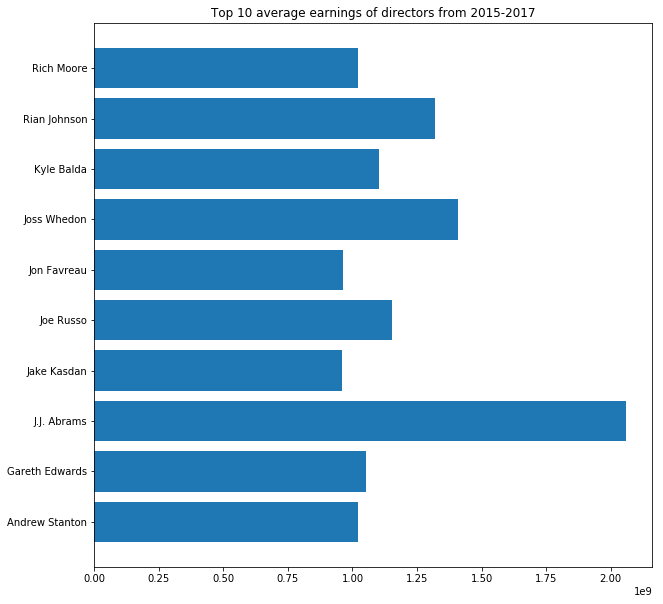

In [183]:
fig, ax = plt.subplots(1,figsize=(10,10))
ax.barh(top_10_directors.index, width = top_10_directors['ww_agg'] )
ax.set_title('Top 10 average earnings of directors from 2015-2017')

In [178]:
top_10_directors

,Domestic Box Office,International Box Office,Production Budget,ww_agg,log_ww_agg,log_budget,is_franchise
Director,,,,,,,
J.J. Abrams,936662225.0,1.122000e+09,306000000.0,2.058662e+09,21.445322,19.539096,1.0
Joss Whedon,459005868.0,9.492129e+08,330600000.0,1.408219e+09,21.065591,19.616420,1.0
Rian Johnson,620181382.0,7.000329e+08,10000000.0,1.320214e+09,21.001060,16.118096,1.0
Joe Russo,408084349.0,7.452201e+08,250000000.0,1.153304e+09,20.865897,19.336971,1.0
Kyle Balda,300335035.0,8.005590e+08,74500000.0,1.100894e+09,20.817569,18.126287,1.0
Gareth Edwards,532177324.0,5.188112e+08,200000000.0,1.050988e+09,20.772997,19.113828,1.0
Andrew Stanton,486295561.0,5.363218e+08,200000000.0,1.022617e+09,20.745631,19.113828,1.0
Rich Moore,341268248.0,6.786527e+08,150000000.0,1.019921e+09,20.742991,18.826146,0.0
Jon Favreau,364001123.0,5.999000e+08,175000000.0,9.639011e+08,20.686499,18.980297,0.0
